In [68]:
#Loading Necessary Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

***Data Cleaning and Preliminary Analysis***

In [69]:
#Importing data (Orginal DataSet) in CSV format
df = pd.read_csv('vehicles_org.csv')

In [70]:
#Data Structure
df.head(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [71]:
shape_before_cleaning = df.shape
shape_before_cleaning

(426880, 26)

In [72]:
# Displaying all the columns filtered by the given condition
filtered_df = df[df["VIN"] == "1FMJU1JT1HEA52352"][['id','VIN','region', 'year', 'price', 'manufacturer', 'condition', 'posting_date']]
filtered_df

,id,VIN,region,year,price,manufacturer,condition,posting_date
76,7311818189,1FMJU1JT1HEA52352,auburn,2017.0,29590,ford,good,2021-04-24T08:52:07-0500
707,7311865995,1FMJU1JT1HEA52352,birmingham,2017.0,29590,ford,good,2021-04-24T10:21:06-0500
1935,7311801032,1FMJU1JT1HEA52352,dothan,2017.0,29590,ford,good,2021-04-24T08:08:57-0500
2201,7311915565,1FMJU1JT1HEA52352,florence / muscle shoals,2017.0,29590,ford,good,2021-04-24T11:41:02-0500
2377,7311823034,1FMJU1JT1HEA52352,gadsden-anniston,2017.0,29590,ford,good,2021-04-24T09:01:32-0500
...,...,...,...,...,...,...,...,...
420611,7311842926,1FMJU1JT1HEA52352,madison,2017.0,29590,ford,good,2021-04-24T09:40:52-0500
423786,7311784162,1FMJU1JT1HEA52352,milwaukee,2017.0,29590,ford,good,2021-04-24T07:11:52-0500
425368,7311832579,1FMJU1JT1HEA52352,sheboygan,2017.0,29590,ford,good,2021-04-24T09:21:05-0500
425834,7311967545,1FMJU1JT1HEA52352,wausau,2017.0,29590,ford,good,2021-04-24T13:01:24-0500


In [73]:
#Printing all the Columns
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [74]:
#Checking the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [75]:
#Finding redundant listings of cars with the same engine number but in different locations
df[df["VIN"] == "1FMJU1JT1HEA52352"].head(3)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
76,7311818189,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,29590,2017.0,ford,expedition xlt sport,good,6 cylinders,...,NaN,SUV,blue,https://images.craigslist.org/00D0D_aqVh7XGmJc...,Carvana is the safer way to buy a car During t...,NaN,al,32.59,-85.48,2021-04-24T08:52:07-0500
707,7311865995,https://bham.craigslist.org/ctd/d/birmingham-2...,birmingham,https://bham.craigslist.org,29590,2017.0,ford,expedition xlt sport,good,6 cylinders,...,NaN,SUV,blue,https://images.craigslist.org/00D0D_aqVh7XGmJc...,Carvana is the safer way to buy a car During t...,NaN,al,33.52,-86.79,2021-04-24T10:21:06-0500
1935,7311801032,https://dothan.craigslist.org/ctd/d/dothan-201...,dothan,https://dothan.craigslist.org,29590,2017.0,ford,expedition xlt sport,good,6 cylinders,...,NaN,SUV,blue,https://images.craigslist.org/00D0D_aqVh7XGmJc...,Carvana is the safer way to buy a car During t...,NaN,al,31.23,-85.40,2021-04-24T08:08:57-0500


In [76]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [77]:
# Generating descriptive statistics for the DataFrame
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [78]:
# Retrieving unique values in the 'manufacturer' column
df['manufacturer'].unique()

array([nan, 'gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi',
       'volkswagen', 'porsche', 'kia', 'rover', 'ferrari', 'mini',
       'pontiac', 'fiat', 'tesla', 'saturn', 'mercury', 'harley-davidson',
       'datsun', 'aston-martin', 'land rover', 'morgan'], dtype=object)

In [79]:
# Printing the number of missing values in each column of the DataFrame
print(df.isnull().sum())

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64


In [80]:
# Calculating the percentage of missing values in each column of the DataFrame
na_percentage = df.isna().sum() / df.shape[0] * 100
print(na_percentage)

id                0.000000
url               0.000000
region            0.000000
region_url        0.000000
price             0.000000
year              0.282281
manufacturer      4.133714
model             1.236179
condition        40.785232
cylinders        41.622470
fuel              0.705819
odometer          1.030735
title_status      1.930753
transmission      0.598763
VIN              37.725356
drive            30.586347
size             71.767476
type             21.752717
paint_color      30.501078
image_url         0.015930
description       0.016398
county          100.000000
state             0.000000
lat               1.534155
long              1.534155
posting_date      0.015930
dtype: float64


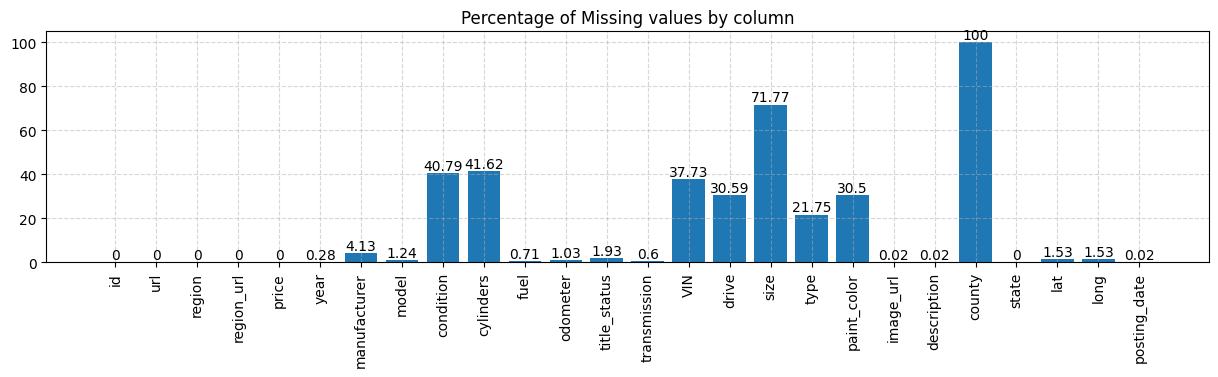

In [81]:
# Creating a bar plot to visualize the percentage of NaN values in each column
fig, ax = plt.subplots(figsize=[15, 3])
bars = ax.bar(x=df.columns, height=round(na_percentage, 2))
ax.bar_label(bars)
ax.tick_params(axis='x', rotation=90)
ax.tick_params(axis='y')
plt.title("Percentage of Missing values by column")
plt.grid(linestyle="dashed", alpha=0.5)
plt.show()

In [82]:
# Dropping the 'county' column from the dataFrame
df.drop(columns='county', inplace=True)

In [83]:
#Checking for the number of unique values in our categorical column
num_col = list(df.select_dtypes(include=["int64", "float64"]).columns)
cat_col = list(df.select_dtypes(include="object").columns)


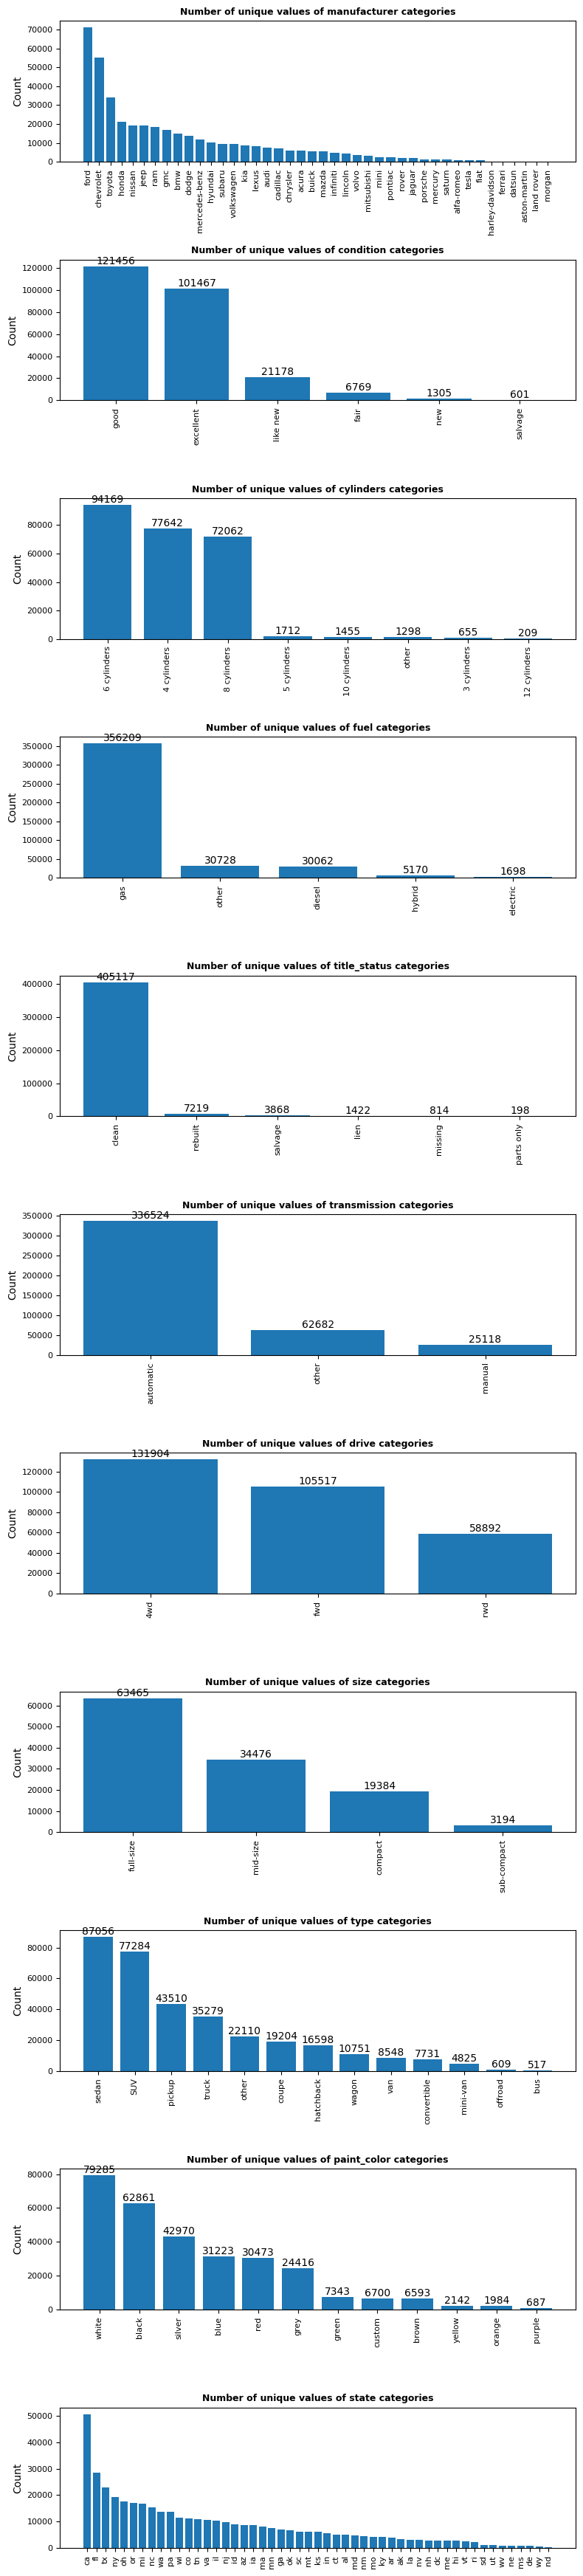

In [84]:
#visualizing categorical columns using barchart. we will exclude columns that have >100 unique values to prevent cluster in visualization

fig, ax = plt.subplots(11, 1, figsize=[8, 35])
index = 0
for column in cat_col:
    if df[column].nunique() < 100:
        # Bar plot:
        bars = ax[index].bar(x=df[column].value_counts().index,
                             height=df[column].value_counts())
        
        if df[column].nunique() < 15:
             # Numeric label above each bar (only if few labels)
            ax[index].bar_label(bars)

        # Rotation of axis labels for better visuals
        ax[index].tick_params(axis='x', rotation=90, labelsize= 8)
        ax[index].tick_params(axis='y', labelsize= 8)
        ax[index].set_ylabel('Count')
          # Set the subplot title
        ax[index].set_title(f"Number of unique values of {column} categories", fontdict = {"fontsize": 9, "fontweight": "bold"})
        
        # Increment the subplot index
        index += 1

plt.tight_layout()
plt.show()

In [85]:
#Checking duplicates
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
426875    False
426876    False
426877    False
426878    False
426879    False
Length: 426880, dtype: bool

In [86]:
#Droping duplicates
df.drop_duplicates()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,fwd,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,fwd,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [87]:
#dropinbg columns irrelevant for analysis
df.drop(columns=["url", "region_url", "image_url"], inplace=True)

In [88]:
#remove cars with salvage condition because they are not suitable for Analysis
salvage_cars = df[df["condition"] == "salvage"].index
df.drop(index=salvage_cars, axis=0, inplace=True, errors="ignore")

In [89]:
#Price is the most important feature in our analysis
#Filtering enteries where price is >1million(1E6)
df[df["price"]>1E6].head(2)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,VIN,drive,size,type,paint_color,description,state,lat,long,posting_date
280,7315849335,birmingham,987654321,1960.0,chevrolet,NaN,NaN,NaN,gas,999999.0,...,NaN,NaN,NaN,NaN,NaN,(TRADE VALUE IS HIGHER )I have a 1960 Impala h...,al,33.633900,-86.598100,2021-05-02T13:24:09-0500
1838,7315961634,dothan,99999999,1993.0,ford,ranger,NaN,NaN,gas,99999.0,...,NaN,NaN,NaN,NaN,NaN,"1993 Ford Ranger, extended cab, 3.0 liter, ne...",al,31.053493,-85.825968,2021-05-02T17:18:25-0500


In [90]:
#we have very high prices and some that look to be a decimal point input problem
df.loc[105843]

id                                                     7314124996
region                                                    orlando
price                                                     6995495
year                                                       2014.0
manufacturer                                                dodge
model                                                     journey
condition                                                     NaN
cylinders                                             4 cylinders
fuel                                                          gas
odometer                                                 135888.0
title_status                                                clean
transmission                                            automatic
VIN                                             3C4PDCAB5ET204162
drive                                                         fwd
size                                                          NaN
type      

In [91]:
#we have almost 8% of the initial values that are either null or less than 10:
df["price"].quantile(0.08)

1.0

In [92]:
df[df["price"]<10].head(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,VIN,drive,size,type,paint_color,description,state,lat,long,posting_date
10,7218893038,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,tx,NaN,NaN,NaN
11,7218325704,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,tx,NaN,NaN,NaN
12,7217788283,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,tx,NaN,NaN,NaN
13,7217147606,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,tx,NaN,NaN,NaN
14,7209027818,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,tx,NaN,NaN,NaN


In [93]:
#the prices are logically incorrect
#define a critiria and remove data that do not meet them
min_price = df[df["price"] < 10].index
max_price = df[df["price"] > 1000000].index

In [94]:
df.drop(index=min_price, axis=0, errors="ignore", inplace=True)
df.drop(index=max_price, axis=0, errors="ignore", inplace=True)

In [95]:
#remove outliers for each year
#we can now perform precise oulier analysis
# we will remove outliers while considering the year of manufacture as a moving element. 
#This is because the median and interquartile range change substantially with respect to the car's year of manufacture:

for year in sorted(df["year"].unique()):
    q1 = df[df["year"] == year]["price"].quantile(0.25)
    q3 =df[df["year"] == year]["price"].quantile(0.75)
    IQR = q3 - q1
    lower_limit = q1 - 1*5*IQR
    upper_limit = q3 + 1*5*IQR
    lower_indexes = df[(df["year"] == year) & (df["price"] < lower_limit)].index
    upper_indexes = df[(df["year"] == year) & (df["price"] > upper_limit)].index
    df.drop(index=lower_indexes, axis=0, errors="ignore", inplace=True)
    df.drop(index=upper_indexes, axis=0, errors="ignore", inplace=True)

In [96]:
#odometer
#we will remove all cars that have more than 300,000 miles (482,000 km)
#and all cars that have fewer than 500 miles (~800 km) and are not categorized as new.
low_odometer =df[(df["odometer"] < 500) & (df["condition"] != "new")].index
high_odometer = df[df["odometer"] > 300000].index
df.drop(index=low_odometer, axis=0, errors="ignore", inplace=True)
df.drop(index=high_odometer, axis=0, errors="ignore", inplace=True)

c:\Users\prudh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


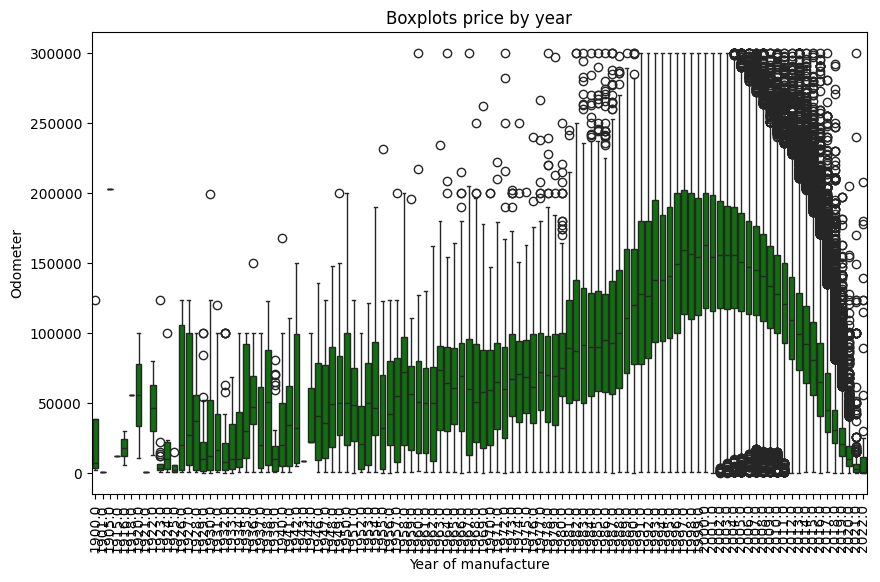

In [97]:
#removve odometer outliers using IQR 
#considering the odometer values for each year similar to what we did for price

plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='odometer', data=df, color ='green')
plt.tick_params(axis='x', rotation=90)
plt.title('Boxplots price by year')
plt.xlabel('Year of manufacture')
plt.ylabel('Odometer')
plt.show() 

In [98]:
for year in sorted(df["year"].unique()):
    q1 = df[df["year"] == year]["odometer"].quantile(0.25)
    q3 = df[df["year"] == year]["odometer"].quantile(0.75)
    IQR = q3 - q1
    lower_limit = q1 - 1*5*IQR
    upper_limit = q3 + 1*5*IQR
    lower_indexes = df[(df["year"] == year) & (df["odometer"] < lower_limit)].index
    upper_indexes = df[(df["year"] == year) & (df["odometer"] > upper_limit)].index
    df.drop(index=lower_indexes, axis=0, errors="ignore", inplace=True)
    df.drop(index=upper_indexes, axis=0, errors="ignore", inplace=True)

In [99]:
#year
#removing outlier values for year
print("2020:", df[df["year"] == 2020].shape)
print("2021:", df[df["year"] == 2021].shape)
print("2022:", df[df["year"] == 2022].shape)

2020: (16893, 22)
2021: (1028, 22)
2022: (38, 22)


In [100]:
low_year = df[df["year"] < 1908].index
high_year = df[df["year"] > 2021].index
df.drop(index=low_year, axis=0, errors="ignore", inplace=True)
df.drop(index=high_year, axis=0, errors="ignore", inplace=True)

**Handling duplicate values**

In [101]:
#During the statistical description of categorical variables, we detected a problem of duplicate values in the VIN

df["VIN"].value_counts()

VIN
1FMJU1JT1HEA52352    261
3C6JR6DT3KG560649    235
1FTER1EH1LLA36301    231
5TFTX4CN3EX042751    227
1GCHTCE37G1186784    214
                    ... 
5GAERAKW1KJ111545      1
1G1JC6SB8E4221416      1
3N1BC11EX8L420351      1
JM3KFABL8H0125562      1
SAJGX2749VCOO8376      1
Name: count, Length: 103441, dtype: int64

In [102]:
df[df["VIN"] == "1FMJU1JT1HEA52352"].head(3)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,VIN,drive,size,type,paint_color,description,state,lat,long,posting_date
76,7311818189,auburn,29590,2017.0,ford,expedition xlt sport,good,6 cylinders,gas,70760.0,...,1FMJU1JT1HEA52352,4wd,NaN,SUV,blue,Carvana is the safer way to buy a car During t...,al,32.59,-85.48,2021-04-24T08:52:07-0500
707,7311865995,birmingham,29590,2017.0,ford,expedition xlt sport,good,6 cylinders,gas,70760.0,...,1FMJU1JT1HEA52352,4wd,NaN,SUV,blue,Carvana is the safer way to buy a car During t...,al,33.52,-86.79,2021-04-24T10:21:06-0500
1935,7311801032,dothan,29590,2017.0,ford,expedition xlt sport,good,6 cylinders,gas,70760.0,...,1FMJU1JT1HEA52352,4wd,NaN,SUV,blue,Carvana is the safer way to buy a car During t...,al,31.23,-85.40,2021-04-24T08:08:57-0500


In [103]:
#using the manufacturer, model, price, year, and VIN as reference values, we will proceed to remove all duplicates we find:

df.drop_duplicates(subset=["price", "year", "manufacturer", "model", "VIN"], keep="first", inplace=True)

**Columns with NaN values**

In [104]:
df.isna().sum() / df.shape[0] * 100

id               0.000000
region           0.000000
price            0.000000
year             0.295776
manufacturer     3.997453
model            1.363776
condition       38.529613
cylinders       34.122226
fuel             0.667028
odometer         0.577399
title_status     1.722763
transmission     0.443428
VIN             48.721372
drive           27.046253
size            63.868198
type            24.186145
paint_color     28.441635
description      0.025474
state            0.000000
lat              0.531641
long             0.531641
posting_date     0.024530
dtype: float64

In [105]:
#established a 40% threshold for removing null values, let us remove all columns that meet this condition
#remove title_status not provide useful info
df.drop(columns=["VIN", "size", "title_status"], inplace=True)

In [106]:
#removing remaining NaNs
df.dropna(inplace=True)
df.isna().sum()


id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
drive           0
type            0
paint_color     0
description     0
state           0
lat             0
long            0
posting_date    0
dtype: int64

In [107]:
df.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'transmission', 'drive', 'type',
       'paint_color', 'description', 'state', 'lat', 'long', 'posting_date'],
      dtype='object')

In [108]:
shape_after_cleaning = df.shape
print(shape_after_cleaning)

(71094, 19)


In [109]:
print(shape_before_cleaning)

(426880, 26)


In [110]:
#Refined percentage
print("Refined Data perecentage")
print(f"{round((shape_after_cleaning[0] / shape_before_cleaning[0] * 100), 3)}%")

Refined Data perecentage
16.654%


In [111]:
df['odometer'] = df['odometer'].astype("int64")
df['year'] = df['year'].astype("int64")

**Feature Relations**

In [112]:
df.corr(numeric_only=True)

,id,price,year,odometer,lat,long
id,1.000000,-0.036401,-0.006386,0.031262,-0.043661,-0.137227
price,-0.036401,1.000000,0.262447,-0.507748,-0.004211,-0.096932
year,-0.006386,0.262447,1.000000,-0.179654,0.001551,0.009490
odometer,0.031262,-0.507748,-0.179654,1.000000,0.006333,0.021456
lat,-0.043661,-0.004211,0.001551,0.006333,1.000000,-0.026491
long,-0.137227,-0.096932,0.009490,0.021456,-0.026491,1.000000


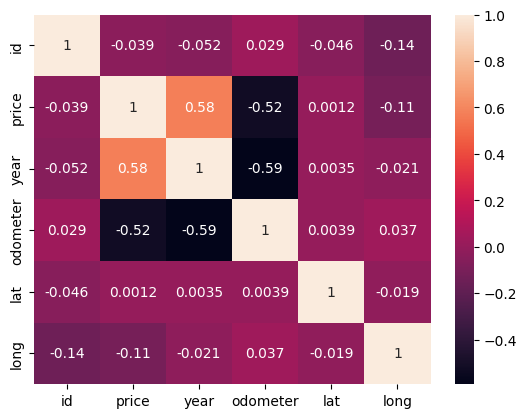

In [113]:
#let us consider the year vs price correlation for yeras post 1998
sns.heatmap(df[df["year"] >= 1998].corr(numeric_only=True), annot=True)
plt.show()

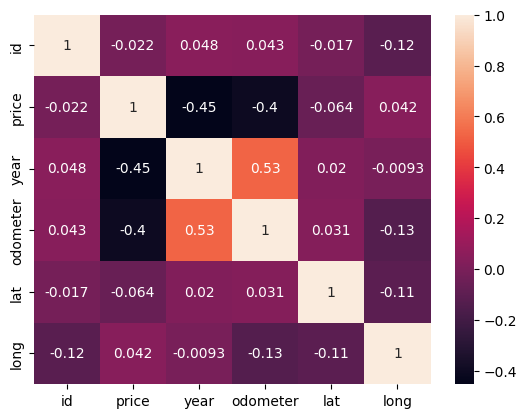

In [114]:
#let us consider the year vs price correlation for yeras before 1998
sns.heatmap(df[df["year"] < 1998].corr(numeric_only=True), annot=True)
plt.show()

In [115]:
df.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'transmission', 'drive', 'type',
       'paint_color', 'description', 'state', 'lat', 'long', 'posting_date'],
      dtype='object')

In [116]:
df.shape

(71094, 19)

In [117]:
import datetime
# Convert 'posting_date' column to Timestamp with UTC=True
df['posting_date'] = pd.to_datetime(df['posting_date'], utc=True)

# Calculate car age
df['car_age'] = df['posting_date'].dt.year - df['year']

# Convert car age to integer
df['car_age'] = df['car_age'].astype(int)


In [118]:
df.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'transmission', 'drive', 'type',
       'paint_color', 'description', 'state', 'lat', 'long', 'posting_date',
       'car_age'],
      dtype='object')

In [119]:
#dropinbg columns irrelevant for analysis
df.drop(columns=["id","year", "posting_date", "region","model","description"], inplace=True)

Creating a new column 'Odometer_Price_Ratio' which is the ratio of the odometer reading to the price of the car. This will help us understand the relationship between the price of the car and the distance it has traveled.

In [120]:
data_cleaned = df
data_cleaned['Odometer_Price_Ratio'] = data_cleaned['odometer'] / data_cleaned['price']

data_cleaned.head(2)


,price,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state,lat,long,car_age,Odometer_Price_Ratio
31,15000,ford,excellent,6 cylinders,gas,128000,automatic,rwd,truck,black,al,32.592,-85.5189,8,8.533333
32,27990,gmc,good,8 cylinders,gas,68696,other,4wd,pickup,black,al,32.590,-85.4800,9,2.454305


In [121]:
# Group by manufacturer and calculate average odo_price
AVG_Odo_Price_Ratio  = data_cleaned.groupby('manufacturer')['Odometer_Price_Ratio'].mean().round(2).reset_index()
#output_filename = 'odo_price_By_Manu.csv' 
#odo_price_By_Manu.to_csv(output_filename, index=False)
#print(f"Updated DataFrame saved to {output_filename}")
AVG_Odo_Price_Ratio.head(4)

,manufacturer,Odometer_Price_Ratio
0,acura,35.05
1,alfa-romeo,8.34
2,aston-martin,1.05
3,audi,22.33


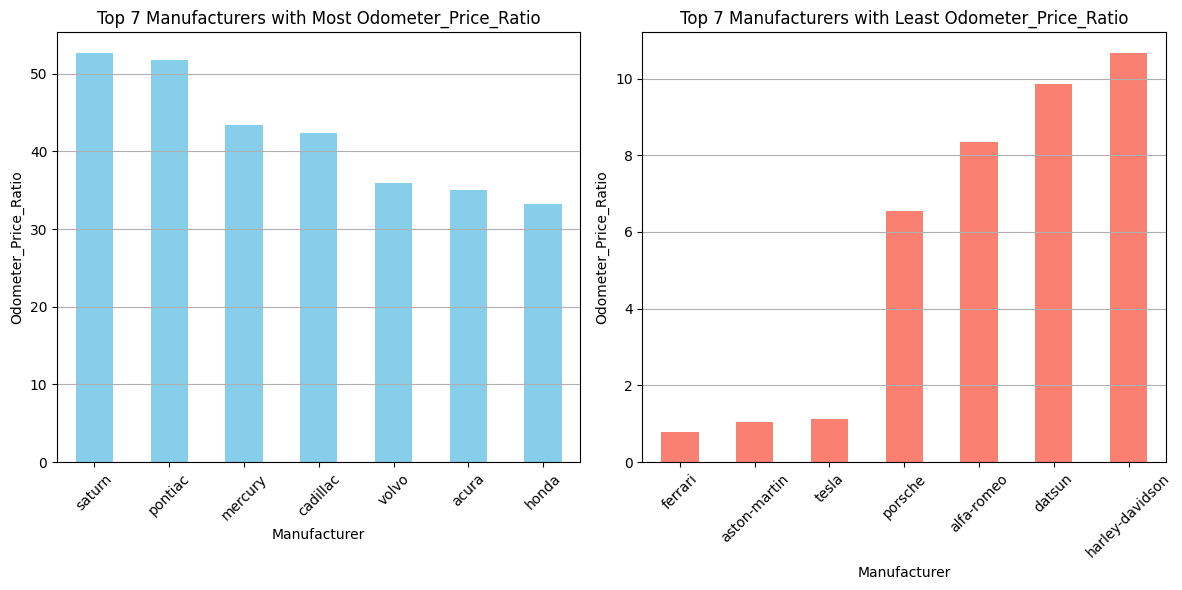

In [122]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already calculated the Odometer_Price_Ratio and stored it in the DataFrame df

# Top 7 manufacturers with the most Odometer_Price_Ratio
top_ratio_manufacturers = df.groupby('manufacturer')['Odometer_Price_Ratio'].mean().nlargest(7)
top_ratio_manufacturers = top_ratio_manufacturers.sort_values(ascending=False)

# Top 7 manufacturers with the least Odometer_Price_Ratio
bottom_ratio_manufacturers = df.groupby('manufacturer')['Odometer_Price_Ratio'].mean().nsmallest(7)
bottom_ratio_manufacturers = bottom_ratio_manufacturers.sort_values(ascending=True)

# Plotting
plt.figure(figsize=(12, 6))

# Plot for top manufacturers with most Odometer_Price_Ratio
plt.subplot(1, 2, 1)
top_ratio_manufacturers.plot(kind='bar', color='skyblue')
plt.title('Top 7 Manufacturers with Most Odometer_Price_Ratio')
plt.xlabel('Manufacturer')
plt.ylabel('Odometer_Price_Ratio')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Plot for top manufacturers with least Odometer_Price_Ratio
plt.subplot(1, 2, 2)
bottom_ratio_manufacturers.plot(kind='bar', color='salmon')
plt.title('Top 7 Manufacturers with Least Odometer_Price_Ratio')
plt.xlabel('Manufacturer')
plt.ylabel('Odometer_Price_Ratio')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


In [123]:
data_cleaned.shape

(71094, 15)

In [124]:
data_cleaned.columns

Index(['price', 'manufacturer', 'condition', 'cylinders', 'fuel', 'odometer',
       'transmission', 'drive', 'type', 'paint_color', 'state', 'lat', 'long',
       'car_age', 'Odometer_Price_Ratio'],
      dtype='object')

In [125]:
# Grouping by manufacturer and calculating mean of 'Odometer_Price_Ratio'
df['Man_dep_OP'] = df.groupby('manufacturer')['Odometer_Price_Ratio'].transform('mean')

In [126]:
df

,price,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state,lat,long,car_age,Odometer_Price_Ratio,Man_dep_OP
31,15000,ford,excellent,6 cylinders,gas,128000,automatic,rwd,truck,black,al,32.592000,-85.518900,8,8.533333,29.615648
32,27990,gmc,good,8 cylinders,gas,68696,other,4wd,pickup,black,al,32.590000,-85.480000,9,2.454305,23.946223
33,34590,chevrolet,good,6 cylinders,gas,29499,other,4wd,pickup,silver,al,32.590000,-85.480000,5,0.852819,29.450105
34,35000,toyota,excellent,6 cylinders,gas,43000,automatic,4wd,truck,grey,al,32.601300,-85.443974,2,1.228571,31.878118
35,29990,chevrolet,good,6 cylinders,gas,17302,other,4wd,pickup,red,al,32.590000,-85.480000,5,0.576926,29.450105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426762,7000,mazda,excellent,other,gas,80000,automatic,rwd,coupe,brown,wy,41.310837,-105.590733,39,11.428571,28.319256
426808,18000,chevrolet,excellent,8 cylinders,gas,130000,automatic,4wd,truck,blue,wy,43.452800,-110.739300,16,7.222222,29.450105
426809,18000,jeep,good,8 cylinders,gas,114400,automatic,4wd,SUV,black,wy,43.452800,-110.739300,31,6.355556,26.389779
426831,9800,nissan,like new,6 cylinders,gas,115000,automatic,rwd,hatchback,red,wy,41.143700,-104.796200,36,11.734694,28.393882


***Feature Engineering***

In [127]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Define columns for one-hot encoding and frequency encoding
df1 = data_cleaned 
columns_one_hot = ['condition', 'fuel', 'transmission', 'drive']
columns_frequency = ['type', 'manufacturer', 'paint_color', 'car_age', 'cylinders']
# Perform one-hot encoding for categorical columns
for col in columns_one_hot:
    df1 = pd.concat([df1, pd.get_dummies(df1[col], prefix=col)], axis=1)
    df1.drop(col, axis=1, inplace=True)
# Perform frequency encoding for categorical columns
for col in columns_frequency:
    freq_encoder = df1[col].value_counts(normalize=True)
    df1[col + '_freq'] = df1[col].map(freq_encoder)
    df1.drop(col, axis=1, inplace=True)


#print(f"Preprocessed data saved to {output_filename}")
columns_to_replace = ['condition_excellent', 'condition_fair', 'condition_good', 
                      'condition_like new', 'condition_new', 'fuel_diesel', 
                      'fuel_electric', 'fuel_gas', 'fuel_hybrid', 'fuel_other', 
                      'transmission_automatic', 'transmission_manual', 
                      'transmission_other', 'drive_4wd', 'drive_fwd', 'drive_rwd']
df1[columns_to_replace] = df1[columns_to_replace].astype(int)

output_filename = 'featured_car_data.csv' 
df1.to_csv(output_filename, index=False)
print(f"Updated DataFrame saved to {output_filename}")



Updated DataFrame saved to featured_car_data.csv


In [128]:
df1.columns

Index(['price', 'odometer', 'state', 'lat', 'long', 'Odometer_Price_Ratio',
       'Man_dep_OP', 'condition_excellent', 'condition_fair', 'condition_good',
       'condition_like new', 'condition_new', 'fuel_diesel', 'fuel_electric',
       'fuel_gas', 'fuel_hybrid', 'fuel_other', 'transmission_automatic',
       'transmission_manual', 'transmission_other', 'drive_4wd', 'drive_fwd',
       'drive_rwd', 'type_freq', 'manufacturer_freq', 'paint_color_freq',
       'car_age_freq', 'cylinders_freq'],
      dtype='object')

## Clustering and Modelling 
* K-Means Clustering (generates 5 different clustered csv files)
* Linear Regressor
* Decision Tree Regressor
* Random forests
* XG Boost

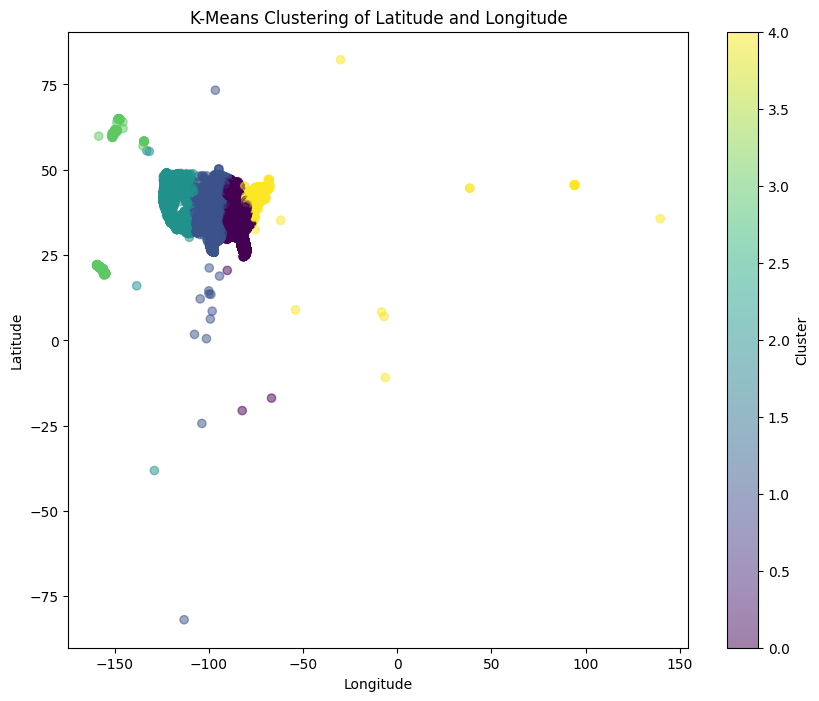

Cluster Centers:
Cluster 1: Latitude = -84.13358651678428, Longitude = 36.596822927175545
Cluster 2: Latitude = -97.61107082940455, Longitude = 37.95601634289412
Cluster 3: Latitude = -118.41359075078051, Longitude = 39.17245258142874
Cluster 4: Latitude = -153.0578216210937, Longitude = 43.2124146171875
Cluster 5: Latitude = -74.4950847380729, Longitude = 41.16385785499906
K-means clustering complete! The updated dataset with cluster labels is saved as 'ML_with_clusters.csv'
CSV files for each cluster Creatingd successfully!


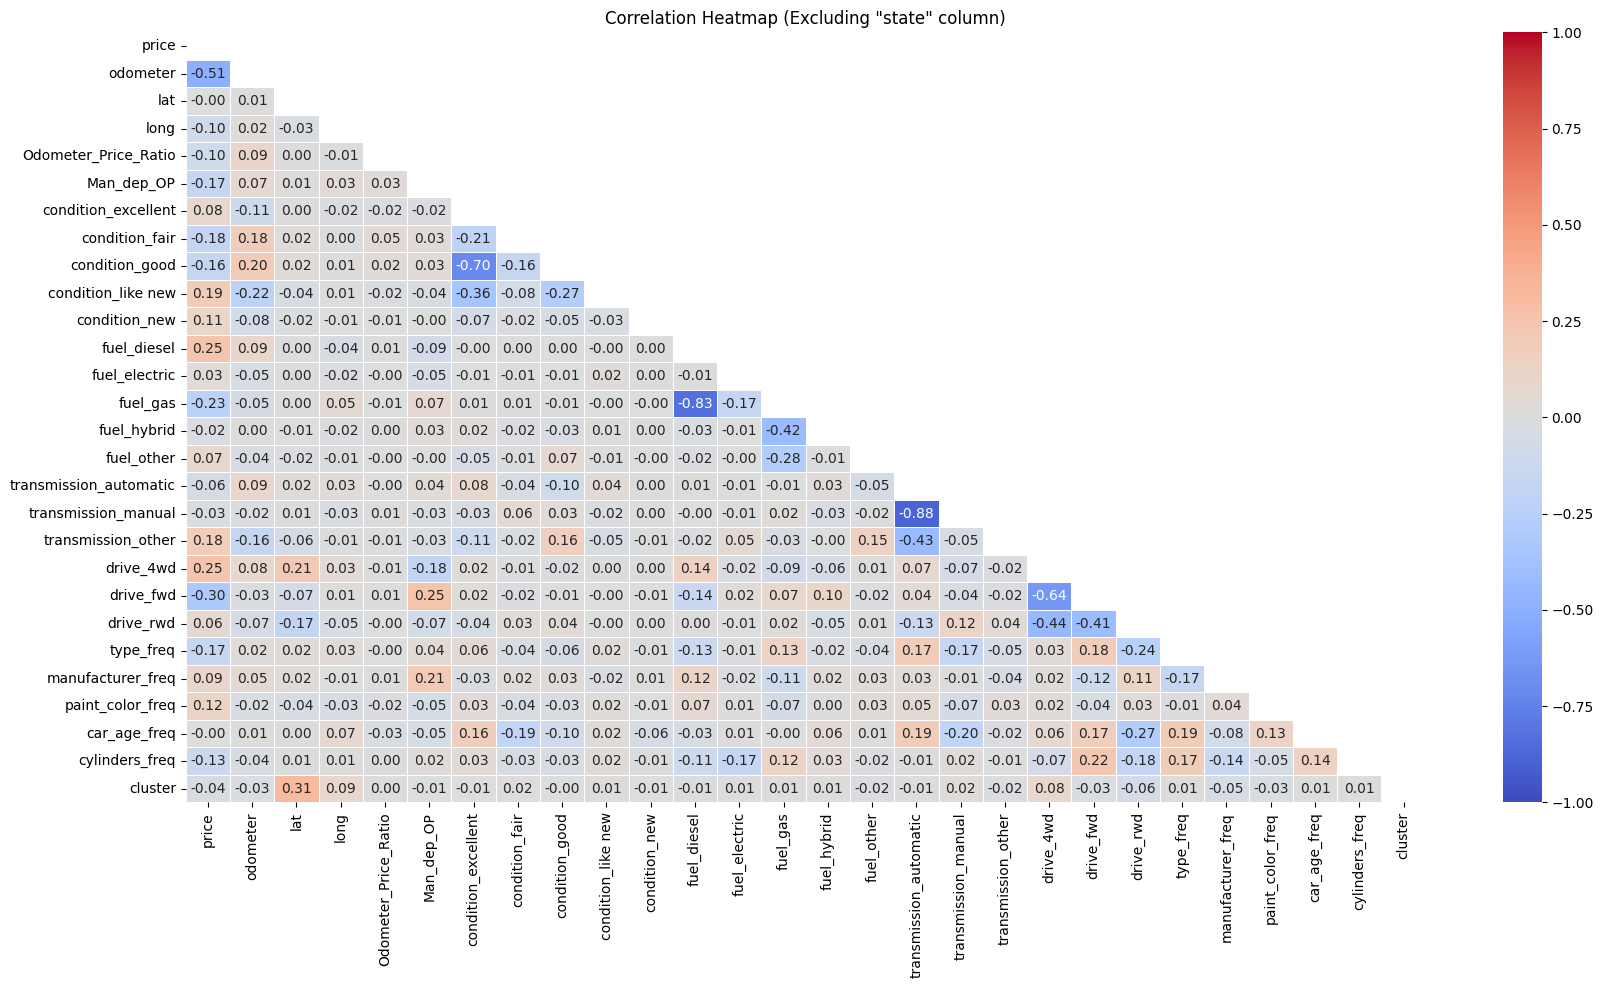

price                     0
odometer                  0
lat                       0
long                      0
Odometer_Price_Ratio      0
Man_dep_OP                0
condition_excellent       0
condition_fair            0
condition_good            0
condition_like new        0
condition_new             0
fuel_diesel               0
fuel_electric             0
fuel_gas                  0
fuel_hybrid               0
fuel_other                0
transmission_automatic    0
transmission_manual       0
transmission_other        0
drive_4wd                 0
drive_fwd                 0
drive_rwd                 0
type_freq                 0
manufacturer_freq         0
paint_color_freq          0
car_age_freq              0
cylinders_freq            0
cluster                   0
dtype: int64


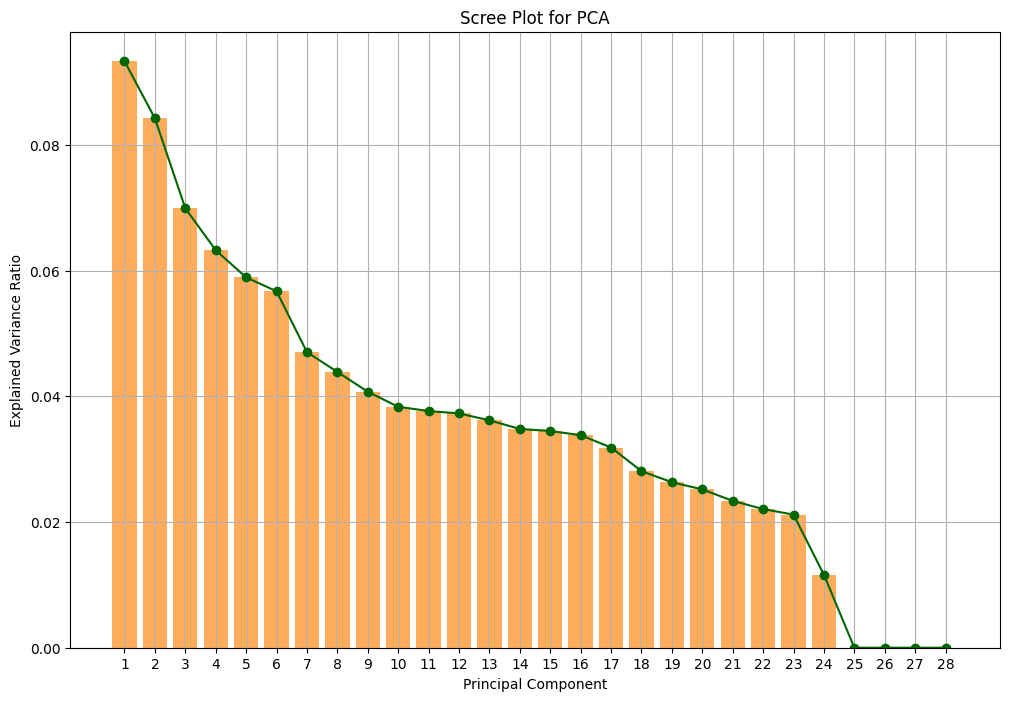

R2 Score of LinearRegression() model on training data: 49.6079006527418
R2 Score of LinearRegression() model on testing data: 48.69373567389642
RMSE of LinearRegression() model on training data: 8294.97716634347
RMSE of LinearRegression() model on testing data: 8325.057367620422


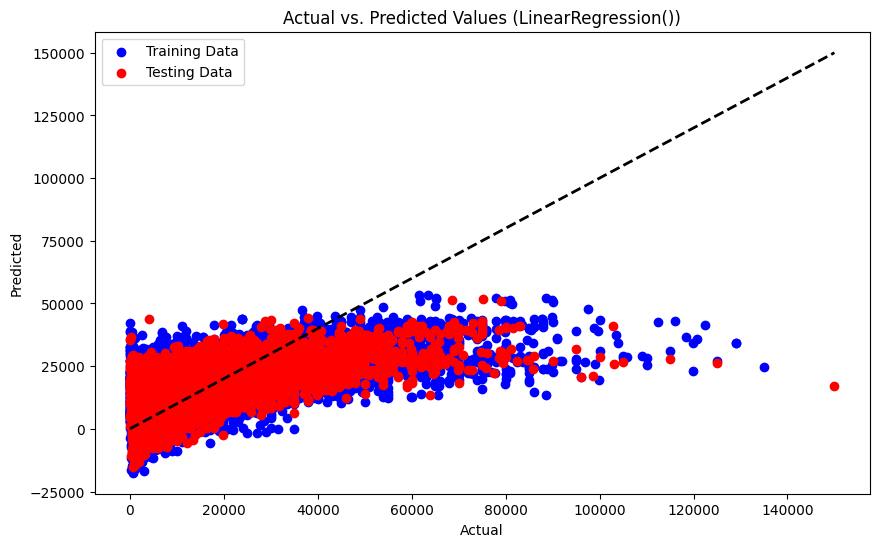

R2 Score of DecisionTreeRegressor() model on training data: 99.97664849840075
R2 Score of DecisionTreeRegressor() model on testing data: 55.440910790717204
RMSE of DecisionTreeRegressor() model on training data: 178.56295957001535
RMSE of DecisionTreeRegressor() model on testing data: 7758.364693072015


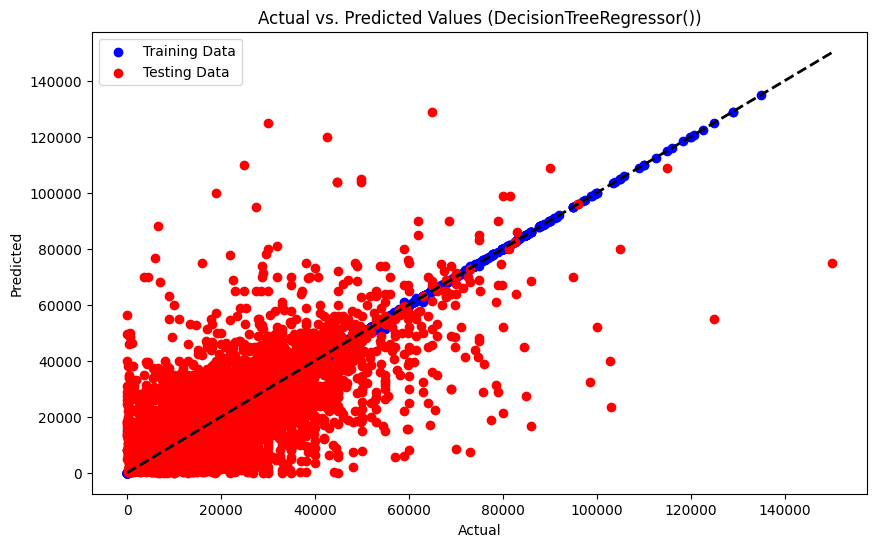

R2 Score of RandomForestRegressor() model on training data: 96.72561075716742
R2 Score of RandomForestRegressor() model on testing data: 76.00651615392141
RMSE of RandomForestRegressor() model on training data: 2114.458284672839
RMSE of RandomForestRegressor() model on testing data: 5693.098445593149


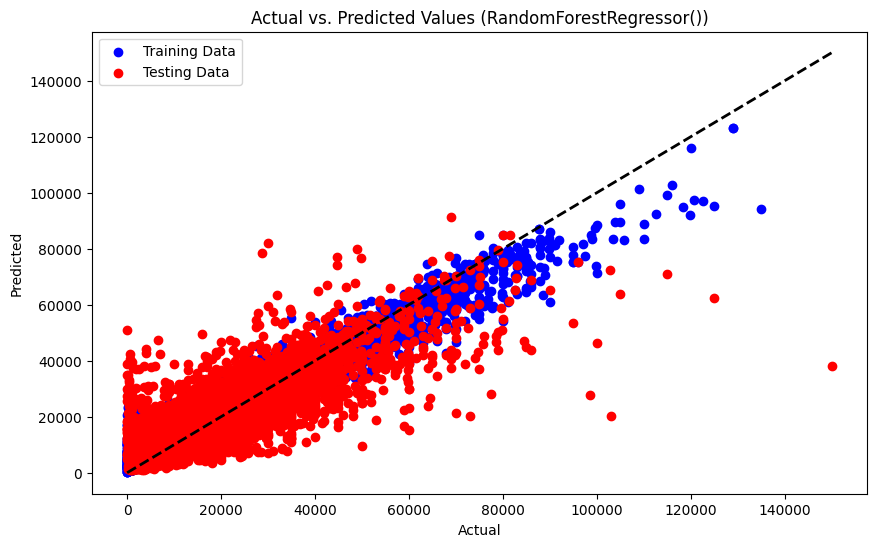

R2 Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) model on training data: 86.44031816852515
R2 Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rou

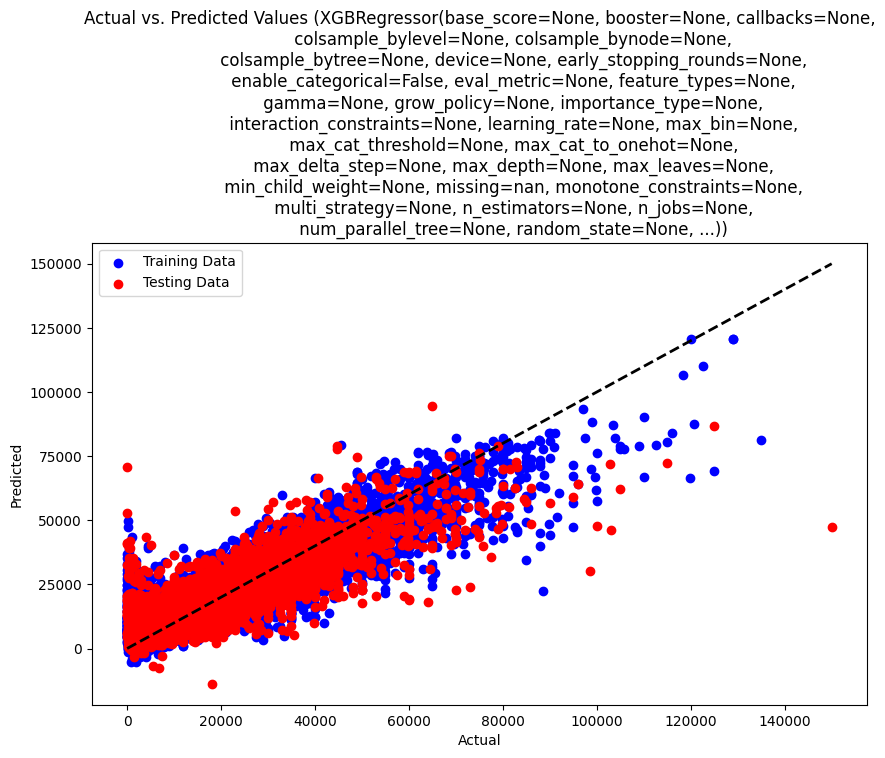

Testing Random Forest model...
Testing Decision Tree model...
Testing XGBoost model...
Testing Linear Regression model...
Predicted price using Random Forest model: [7228.93]
Test R2 Score: 0.7602, Test RMSE: 5691.4403
Test MSE: 32392492.6270
Predicted price using Decision Tree model: [7500.]
Test R2 Score: 0.5456, Test RMSE: 7835.0061
Test MSE: 61387320.4342
Predicted price using XGBoost model: [6112.8633]
Test R2 Score: 0.7953, Test RMSE: 5258.6272
Test MSE: 27653159.8809
Predicted price using Linear Regression model: [12300.92835912]
Test R2 Score: 0.4869, Test RMSE: 8325.0574
Test MSE: 69306580.1742


In [129]:

%run Vehicle_modeling_ML.ipynb

## Modelling on Clusters
Running all ipynb files for all generated clusters
* Linear Regressor
* Decision Tree Regressor
* Random forests
* XG Boost

['al', 'az', 'ar', 'ca', 'co', 'ct', 'de', 'fl', 'ga', 'id', 'il', 'in', 'ia', 'ky', 'la', 'ma', 'mi', 'mn', 'ms', 'mo', 'nc', 'nj', 'ny', 'nh', 'oh', 'or', 'pa', 'sc', 'tn', 'tx', 'va', 'wv', 'wi']
33


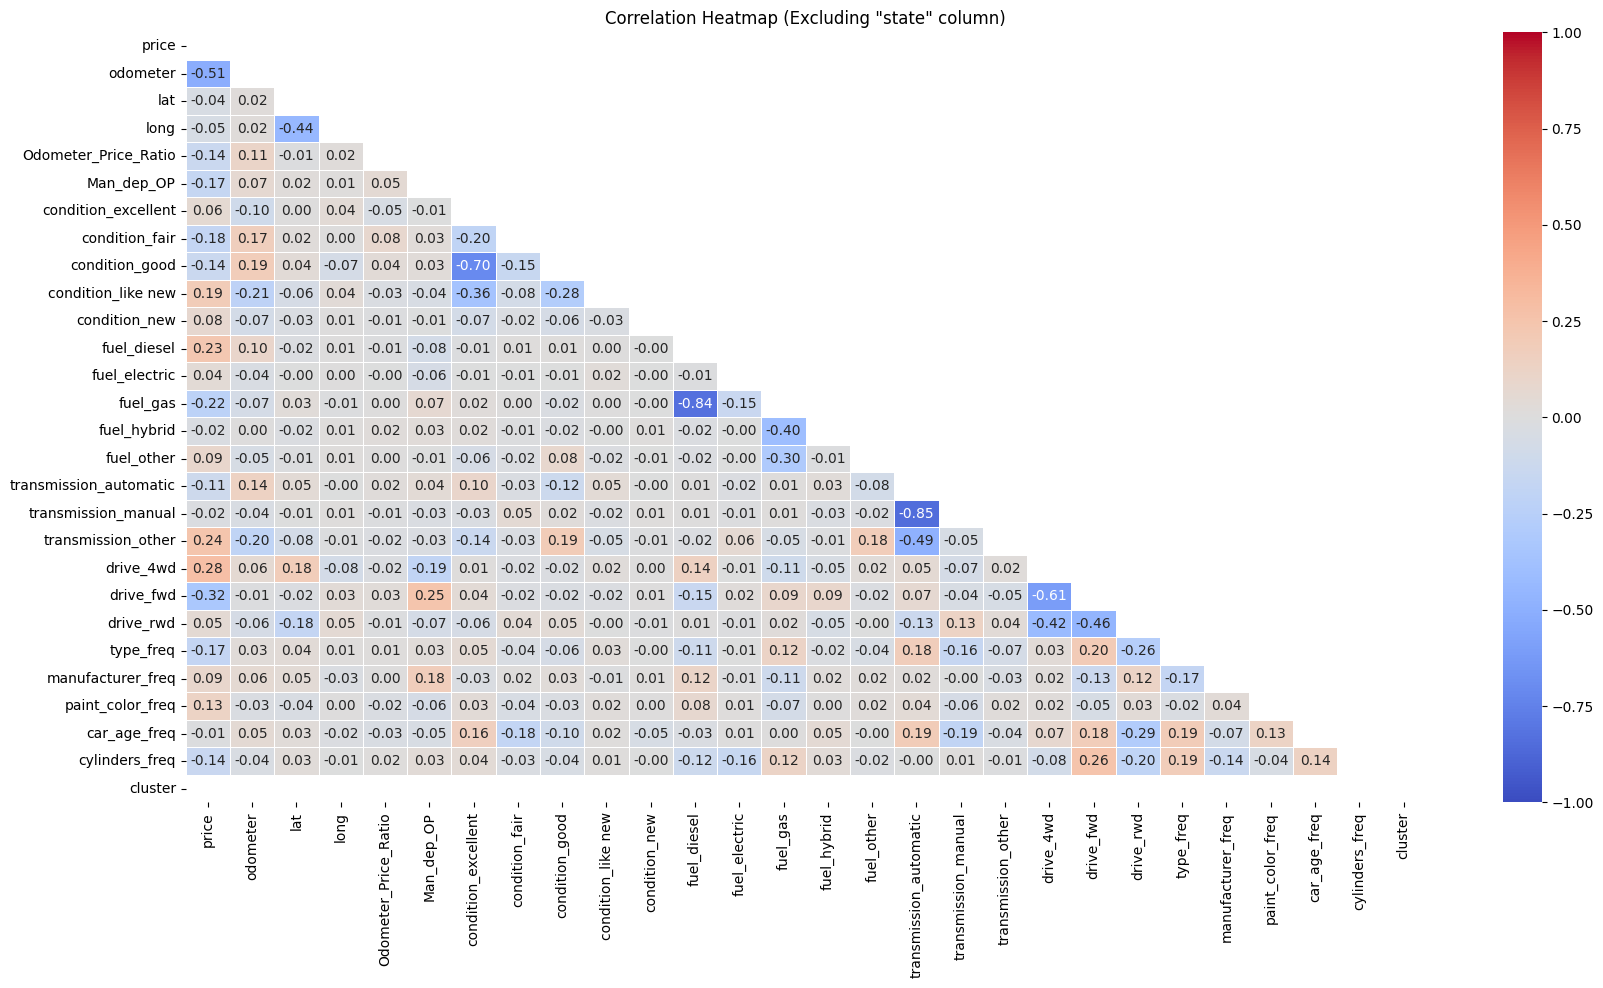

price                     0
odometer                  0
lat                       0
long                      0
Odometer_Price_Ratio      0
Man_dep_OP                0
condition_excellent       0
condition_fair            0
condition_good            0
condition_like new        0
condition_new             0
fuel_diesel               0
fuel_electric             0
fuel_gas                  0
fuel_hybrid               0
fuel_other                0
transmission_automatic    0
transmission_manual       0
transmission_other        0
drive_4wd                 0
drive_fwd                 0
drive_rwd                 0
type_freq                 0
manufacturer_freq         0
paint_color_freq          0
car_age_freq              0
cylinders_freq            0
cluster                   0
dtype: int64


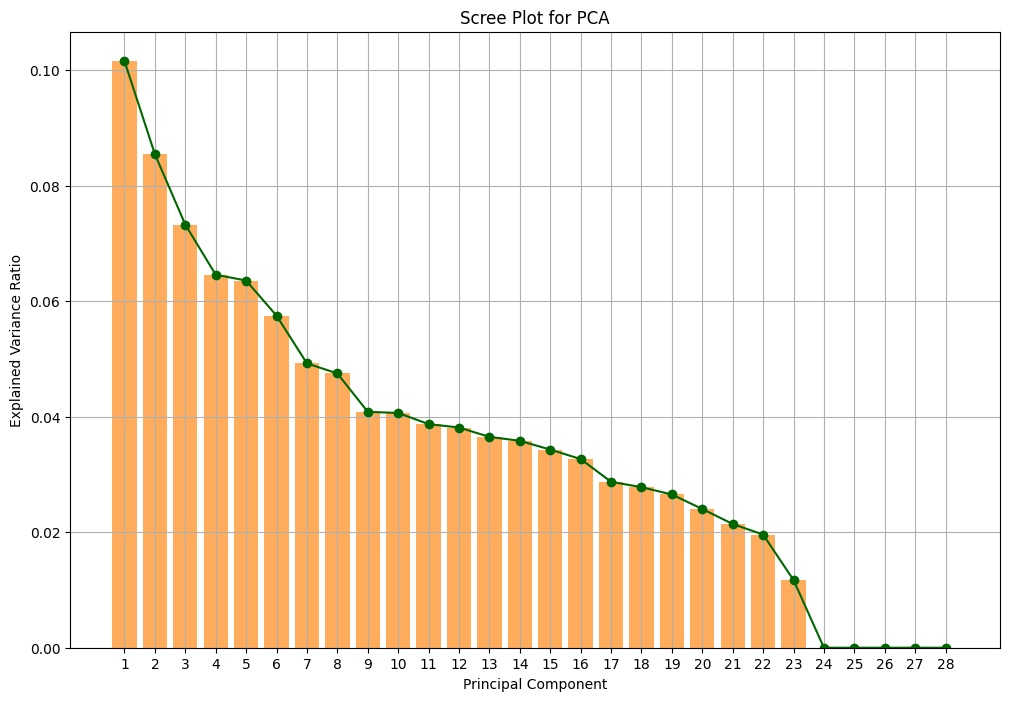

r2_Score of LinearRegression() model on training Data is: 51.213664559818575
r2_Score of LinearRegression() model on testing Data is: 50.920324326130526
RMSE of LinearRegression() model on training Data is: 7906.361662828446
RMSE of LinearRegression() model on testing Data is: 7942.821875442067
***************************************************
***************************************************
r2_Score of DecisionTreeRegressor() model on training Data is: 99.9785818196971
r2_Score of DecisionTreeRegressor() model on testing Data is: 53.59187536537492
RMSE of DecisionTreeRegressor() model on training Data is: 165.66045996194381
RMSE of DecisionTreeRegressor() model on testing Data is: 7723.62163771515
***************************************************
***************************************************
r2_Score of RandomForestRegressor() model on training Data is: 96.63748843360142
r2_Score of RandomForestRegressor() model on testing Data is: 74.39282531303829
RMSE of RandomForestRe

Testing Random Forest model...
Testing Decision Tree model...
Testing XGBoost model...
Testing Linear Regression model...
Predicted price using Random Forest model: [7611.2]
Test R2 Score: 0.7482, Test RMSE: 5688.9300
Predicted price using Decision Tree model: [7499.]
Test R2 Score: 0.5266, Test RMSE: 7800.4823
Predicted price using XGBoost model: [5283.918]
Test R2 Score: 0.8027, Test RMSE: 5035.9409
Predicted price using Linear Regression model: [12319.47932096]
Test R2 Score: 0.5092, Test RMSE: 7942.8219
Predicted price using Random Forest model: [7611.2]
Test R2 Score: 0.7482, Test RMSE: 5688.9300
Test MSE: 32363924.7934
Predicted price using Decision Tree model: [7499.]
Test R2 Score: 0.5266, Test RMSE: 7800.4823
Test MSE: 60847523.7141
Predicted price using XGBoost model: [5283.918]
Test R2 Score: 0.8027, Test RMSE: 5035.9409
Test MSE: 25360700.6513
Predicted price using Linear Regression model: [12319.47932096]
Test R2 Score: 0.5092, Test RMSE: 7942.8219
Test MSE: 63088419.3450


In [130]:
%run Vehicle_Clusters0.ipynb

['al', 'ak', 'az', 'ar', 'ca', 'co', 'ct', 'fl', 'hi', 'id', 'il', 'in', 'ia', 'ks', 'ky', 'la', 'md', 'ma', 'mi', 'mn', 'ms', 'mo', 'mt', 'nc', 'ne', 'nv', 'nj', 'nm', 'ny', 'nd', 'oh', 'ok', 'or', 'pa', 'sd', 'tn', 'tx', 'ut', 'vt', 'va', 'wi', 'wy']
42


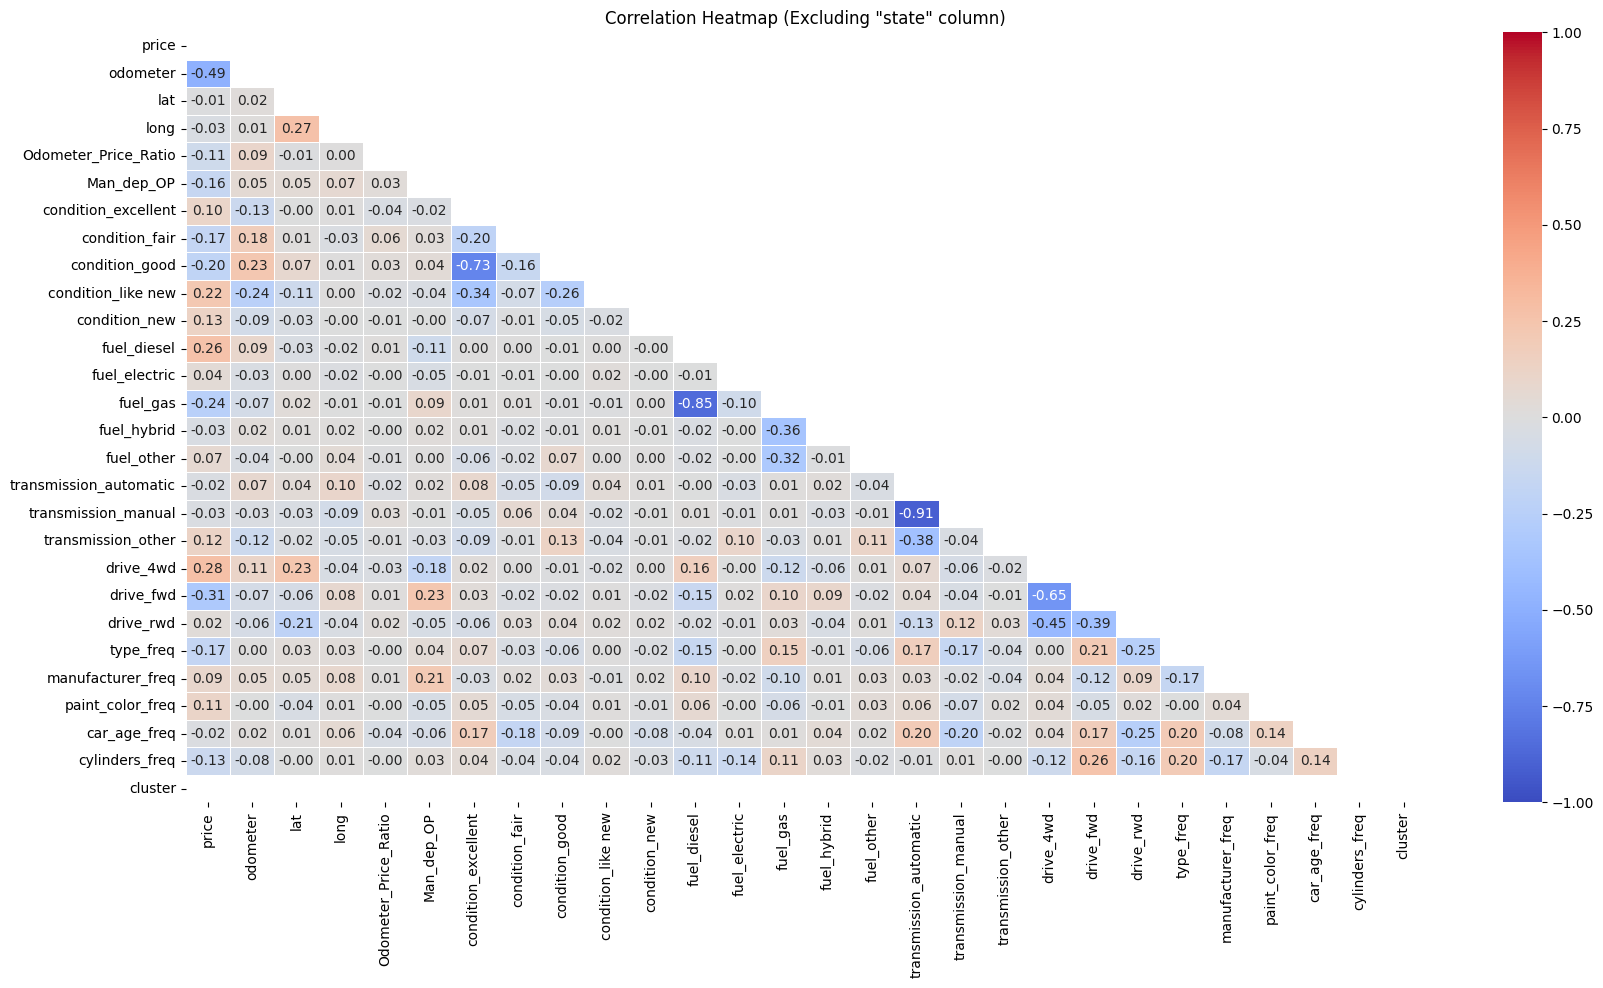

price                     0
odometer                  0
lat                       0
long                      0
Odometer_Price_Ratio      0
Man_dep_OP                0
condition_excellent       0
condition_fair            0
condition_good            0
condition_like new        0
condition_new             0
fuel_diesel               0
fuel_electric             0
fuel_gas                  0
fuel_hybrid               0
fuel_other                0
transmission_automatic    0
transmission_manual       0
transmission_other        0
drive_4wd                 0
drive_fwd                 0
drive_rwd                 0
type_freq                 0
manufacturer_freq         0
paint_color_freq          0
car_age_freq              0
cylinders_freq            0
cluster                   0
dtype: int64


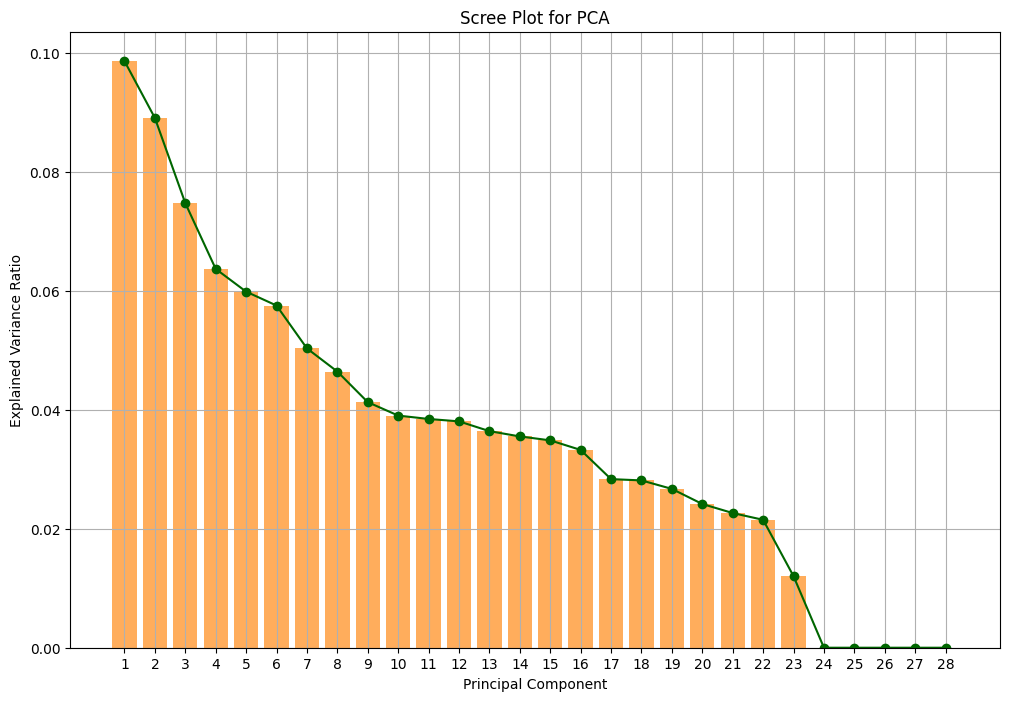

r2_Score of LinearRegression() model on training Data is: 50.11372479164321
r2_Score of LinearRegression() model on testing Data is: 48.78262460269004
RMSE of LinearRegression() model on training Data is: 8292.779385047303
RMSE of LinearRegression() model on testing Data is: 8290.495484759082
***************************************************
***************************************************
r2_Score of DecisionTreeRegressor() model on training Data is: 99.99185361091556
r2_Score of DecisionTreeRegressor() model on testing Data is: 49.07436225690576
RMSE of DecisionTreeRegressor() model on training Data is: 105.97224800184134
RMSE of DecisionTreeRegressor() model on testing Data is: 8266.850152205565
***************************************************
***************************************************
r2_Score of RandomForestRegressor() model on training Data is: 96.29120070669359
r2_Score of RandomForestRegressor() model on testing Data is: 71.74546124744951
RMSE of RandomForestRe

Testing Random Forest model...
Testing Decision Tree model...
Testing XGBoost model...
Testing Linear Regression model...
Predicted price using Random Forest model: [10137.31]
Test R2 Score: 0.7228, Test RMSE: 6098.9728
Predicted price using Decision Tree model: [11900.]
Test R2 Score: 0.5019, Test RMSE: 8176.1917
Predicted price using XGBoost model: [7839.735]
Test R2 Score: 0.7718, Test RMSE: 5533.8407
Predicted price using Linear Regression model: [12681.12625945]
Test R2 Score: 0.4878, Test RMSE: 8290.4955
Predicted price using Random Forest model: [10137.31]
Test R2 Score: 0.7228, Test RMSE: 6098.9728
Test MSE: 37197469.6248
Predicted price using Decision Tree model: [11900.]
Test R2 Score: 0.5019, Test RMSE: 8176.1917
Test MSE: 66850110.9477
Predicted price using XGBoost model: [7839.735]
Test R2 Score: 0.7718, Test RMSE: 5533.8407
Test MSE: 30623392.5785
Predicted price using Linear Regression model: [12681.12625945]
Test R2 Score: 0.4878, Test RMSE: 8290.4955
Test MSE: 68732315

In [131]:
%run Vehicle_Clusters1.ipynb

['ak', 'az', 'ca', 'co', 'dc', 'fl', 'id', 'in', 'mi', 'mt', 'nc', 'nv', 'nj', 'nm', 'ny', 'oh', 'or', 'pa', 'tx', 'ut', 'wa', 'wi', 'wy']
23


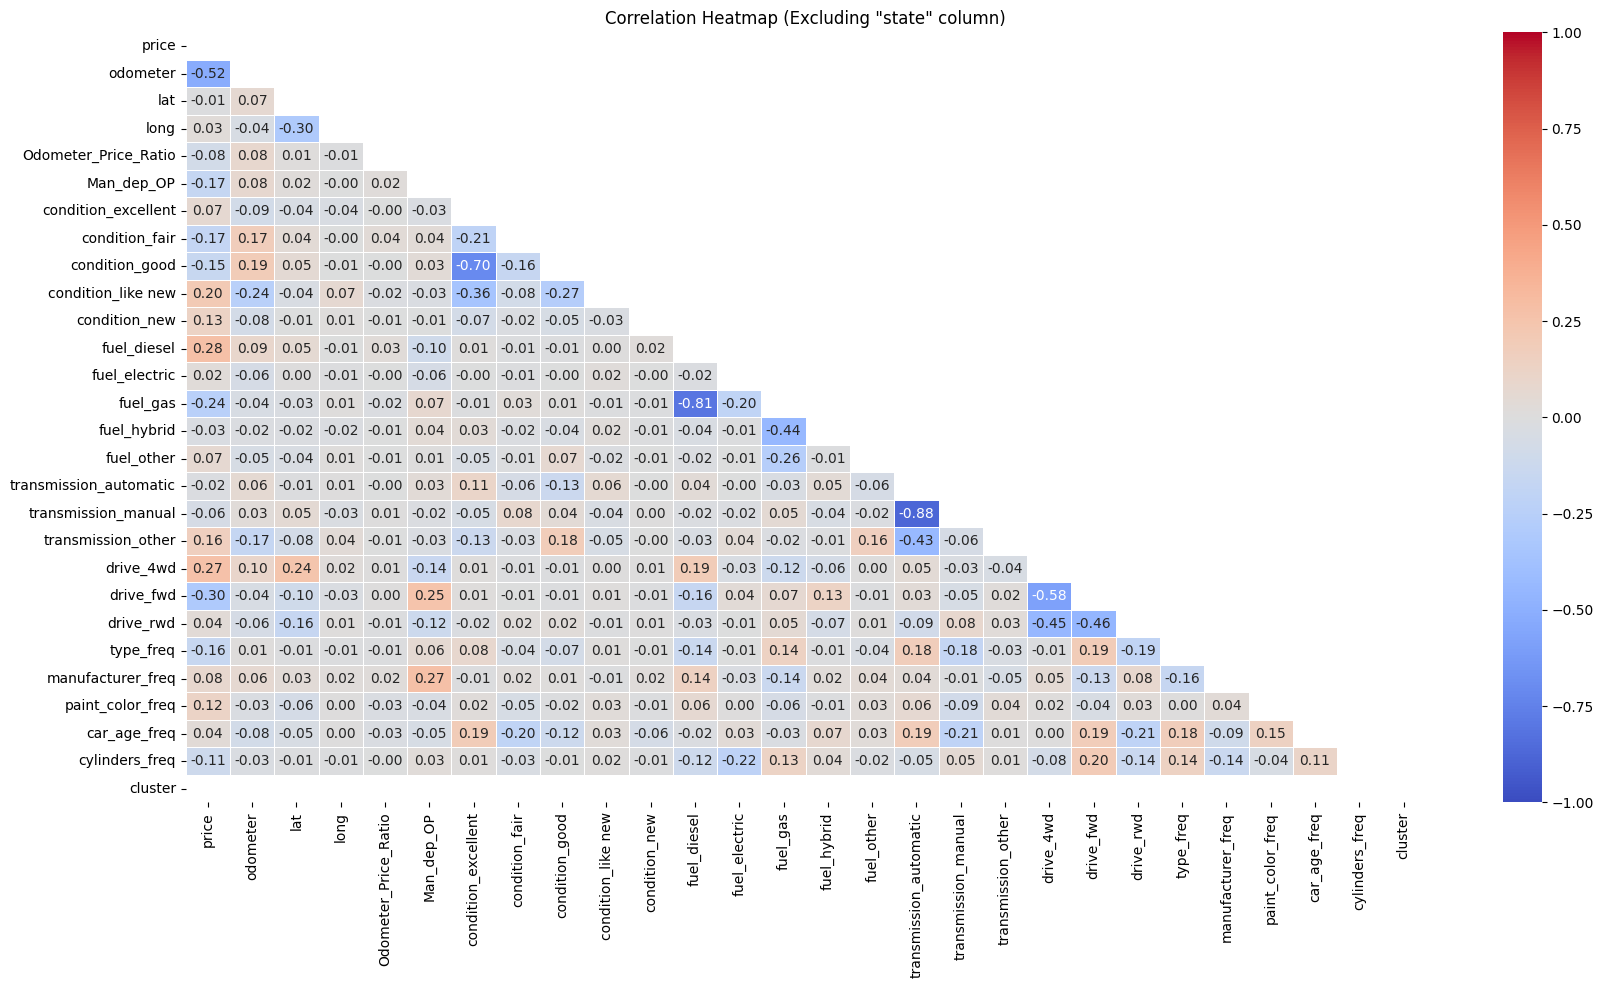

price                     0
odometer                  0
lat                       0
long                      0
Odometer_Price_Ratio      0
Man_dep_OP                0
condition_excellent       0
condition_fair            0
condition_good            0
condition_like new        0
condition_new             0
fuel_diesel               0
fuel_electric             0
fuel_gas                  0
fuel_hybrid               0
fuel_other                0
transmission_automatic    0
transmission_manual       0
transmission_other        0
drive_4wd                 0
drive_fwd                 0
drive_rwd                 0
type_freq                 0
manufacturer_freq         0
paint_color_freq          0
car_age_freq              0
cylinders_freq            0
cluster                   0
dtype: int64


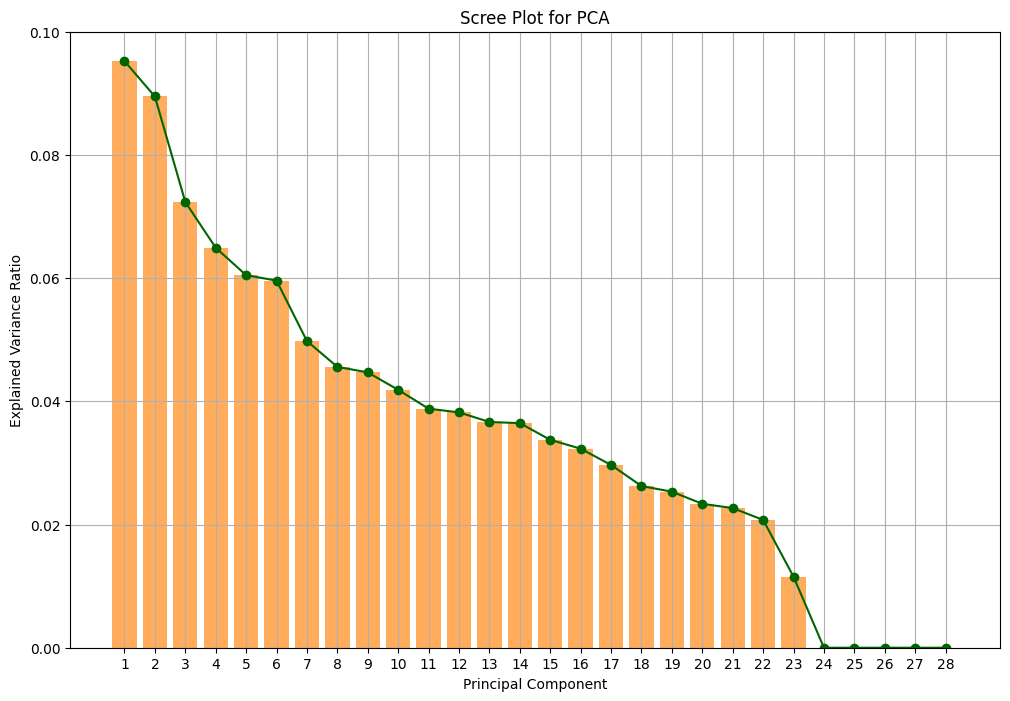

r2_Score of LinearRegression() model on training Data is: 51.46717358018782
r2_Score of LinearRegression() model on testing Data is: 50.54127162137196
RMSE of LinearRegression() model on training Data is: 8929.28517995705
RMSE of LinearRegression() model on testing Data is: 9100.35036538963
***************************************************
***************************************************
r2_Score of DecisionTreeRegressor() model on training Data is: 99.98016702247278
r2_Score of DecisionTreeRegressor() model on testing Data is: 41.52438190664738
RMSE of DecisionTreeRegressor() model on training Data is: 180.5065066238373
RMSE of DecisionTreeRegressor() model on testing Data is: 9895.18801569255
***************************************************
***************************************************
r2_Score of RandomForestRegressor() model on training Data is: 96.28124804848426
r2_Score of RandomForestRegressor() model on testing Data is: 72.81275835126364
RMSE of RandomForestRegres

Testing Random Forest model...
Testing Decision Tree model...
Testing XGBoost model...
Testing Linear Regression model...
Predicted price using Random Forest model: [8476.46]
Test R2 Score: 0.7298, Test RMSE: 6726.7413
Predicted price using Decision Tree model: [7500.]
Test R2 Score: 0.4199, Test RMSE: 9855.3481
Predicted price using XGBoost model: [7238.692]
Test R2 Score: 0.7753, Test RMSE: 6133.7209
Predicted price using Linear Regression model: [13336.25763454]
Test R2 Score: 0.5054, Test RMSE: 9100.3504
Predicted price using Random Forest model: [8476.46]
Test R2 Score: 0.7298, Test RMSE: 6726.7413
Test MSE: 45249048.9586
Predicted price using Decision Tree model: [7500.]
Test R2 Score: 0.4199, Test RMSE: 9855.3481
Test MSE: 97127887.1449
Predicted price using XGBoost model: [7238.692]
Test R2 Score: 0.7753, Test RMSE: 6133.7209
Test MSE: 37622532.1430
Predicted price using Linear Regression model: [13336.25763454]
Test R2 Score: 0.5054, Test RMSE: 9100.3504
Test MSE: 82816376.772

In [132]:
%run Vehicle_Clusters2.ipynb

['ak', 'hi']
2


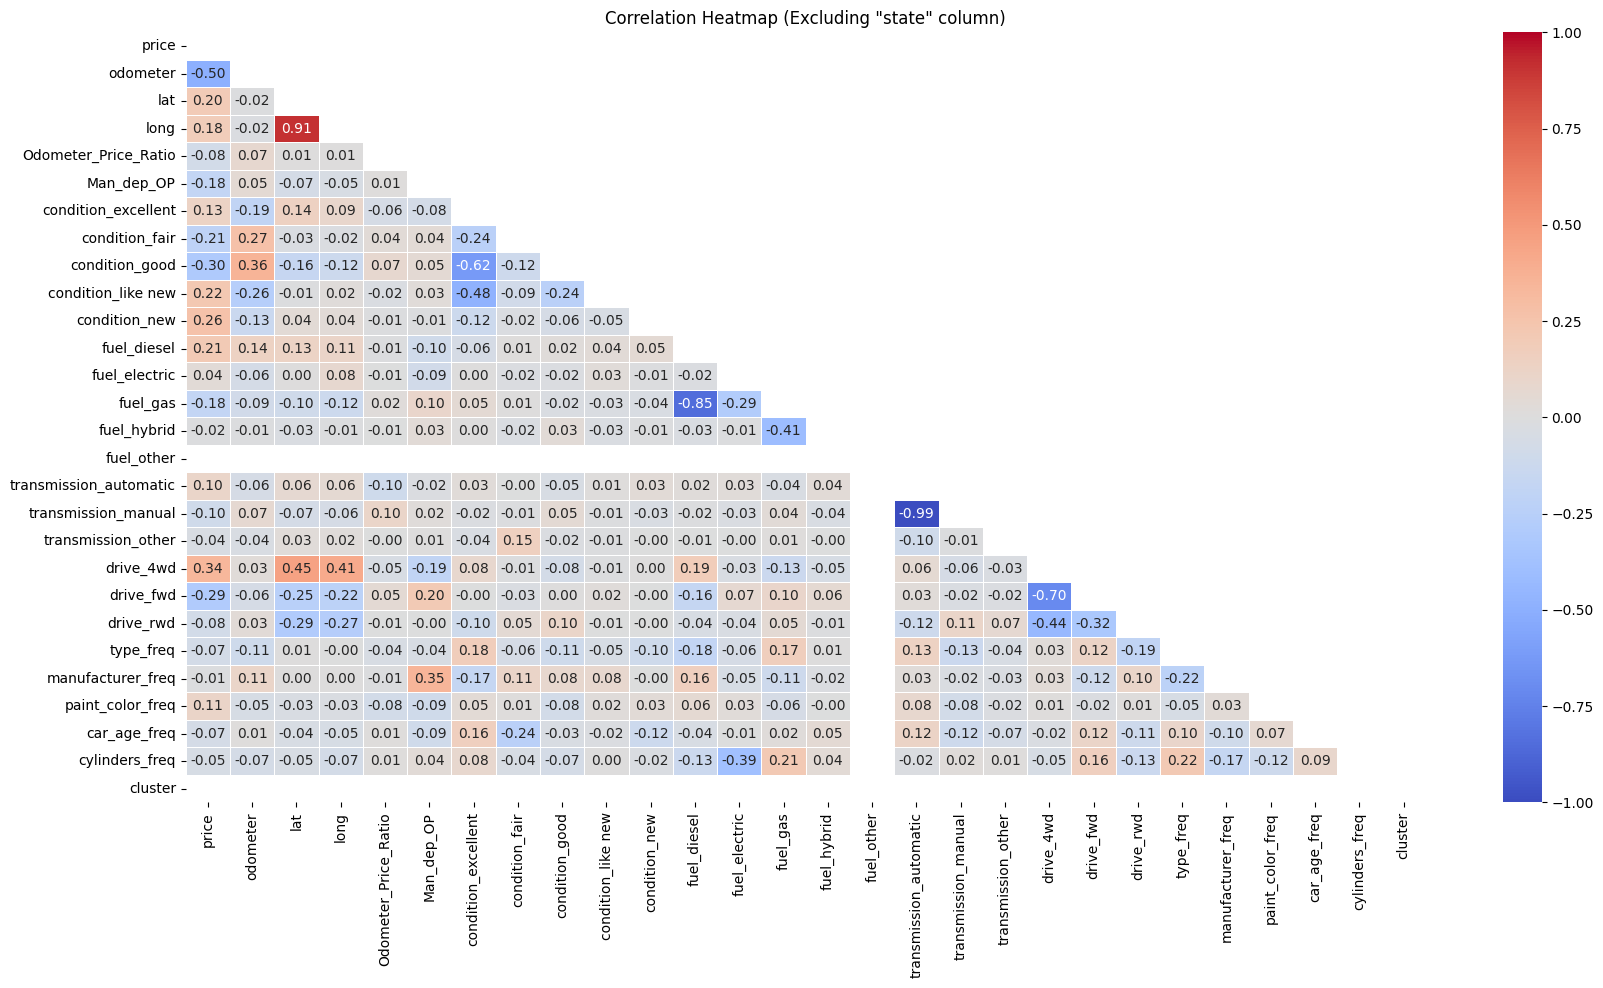

price                     0
odometer                  0
lat                       0
long                      0
Odometer_Price_Ratio      0
Man_dep_OP                0
condition_excellent       0
condition_fair            0
condition_good            0
condition_like new        0
condition_new             0
fuel_diesel               0
fuel_electric             0
fuel_gas                  0
fuel_hybrid               0
fuel_other                0
transmission_automatic    0
transmission_manual       0
transmission_other        0
drive_4wd                 0
drive_fwd                 0
drive_rwd                 0
type_freq                 0
manufacturer_freq         0
paint_color_freq          0
car_age_freq              0
cylinders_freq            0
cluster                   0
dtype: int64


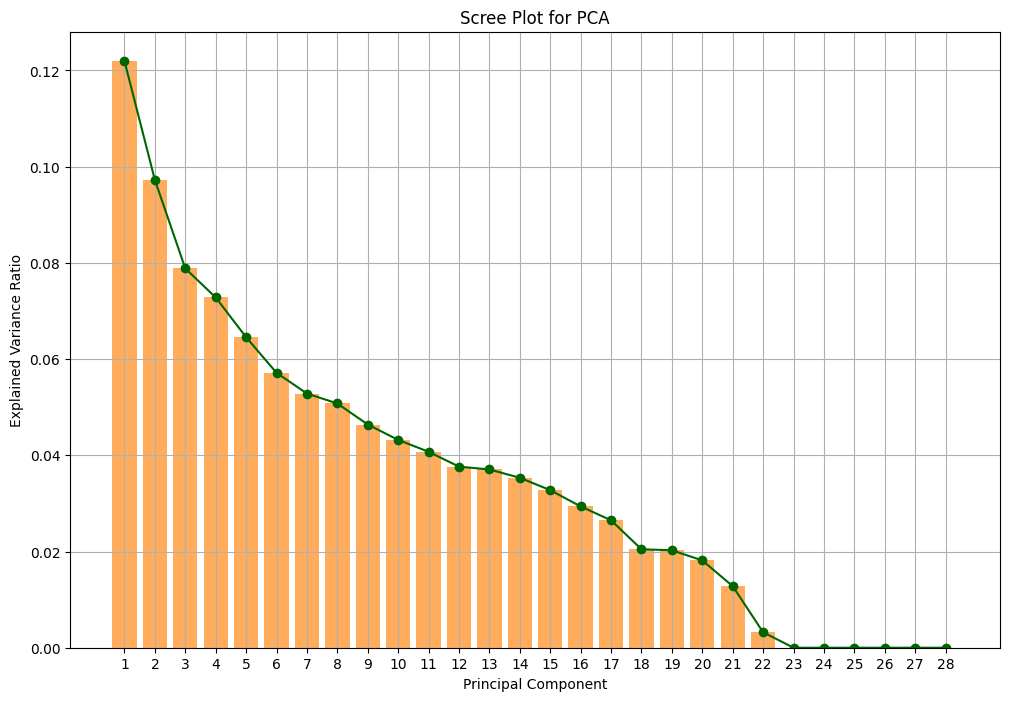

r2_Score of LinearRegression() model on training Data is: 51.16715331822821
r2_Score of LinearRegression() model on testing Data is: 43.804507542804316
RMSE of LinearRegression() model on training Data is: 11598.345757320825
RMSE of LinearRegression() model on testing Data is: 11159.074809707294
***************************************************
***************************************************
r2_Score of DecisionTreeRegressor() model on training Data is: 99.99999113525936
r2_Score of DecisionTreeRegressor() model on testing Data is: 41.55838030746575
RMSE of DecisionTreeRegressor() model on training Data is: 4.941662111074008
RMSE of DecisionTreeRegressor() model on testing Data is: 11379.903262480513
***************************************************
***************************************************
r2_Score of RandomForestRegressor() model on training Data is: 95.082774544307
r2_Score of RandomForestRegressor() model on testing Data is: 62.059930710728835
RMSE of RandomForest

Testing Random Forest model...
Testing Decision Tree model...
Testing XGBoost model...
Testing Linear Regression model...
Predicted price using Random Forest model: [12693.66]
Test R2 Score: 0.6176, Test RMSE: 9205.6923
Predicted price using Decision Tree model: [2995.]
Test R2 Score: 0.4161, Test RMSE: 11374.4086
Predicted price using XGBoost model: [8482.823]
Test R2 Score: 0.6392, Test RMSE: 8941.0570
Predicted price using Linear Regression model: [14266.43572984]
Test R2 Score: 0.4380, Test RMSE: 11159.0748
Predicted price using Random Forest model: [12693.66]
Test R2 Score: 0.6176, Test RMSE: 9205.6923
Test MSE: 84744770.3387
Predicted price using Decision Tree model: [2995.]
Test R2 Score: 0.4161, Test RMSE: 11374.4086
Test MSE: 129377171.0829
Predicted price using XGBoost model: [8482.823]
Test R2 Score: 0.6392, Test RMSE: 8941.0570
Test MSE: 79942500.1433
Predicted price using Linear Regression model: [14266.43572984]
Test R2 Score: 0.4380, Test RMSE: 11159.0748
Test MSE: 12452

In [133]:
%run Vehicle_Clusters3.ipynb

['al', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'in', 'ky', 'me', 'md', 'ma', 'mi', 'mn', 'nc', 'nj', 'ny', 'nh', 'oh', 'pa', 'ri', 'tn', 'tx', 'vt', 'va', 'wv', 'wi']
28


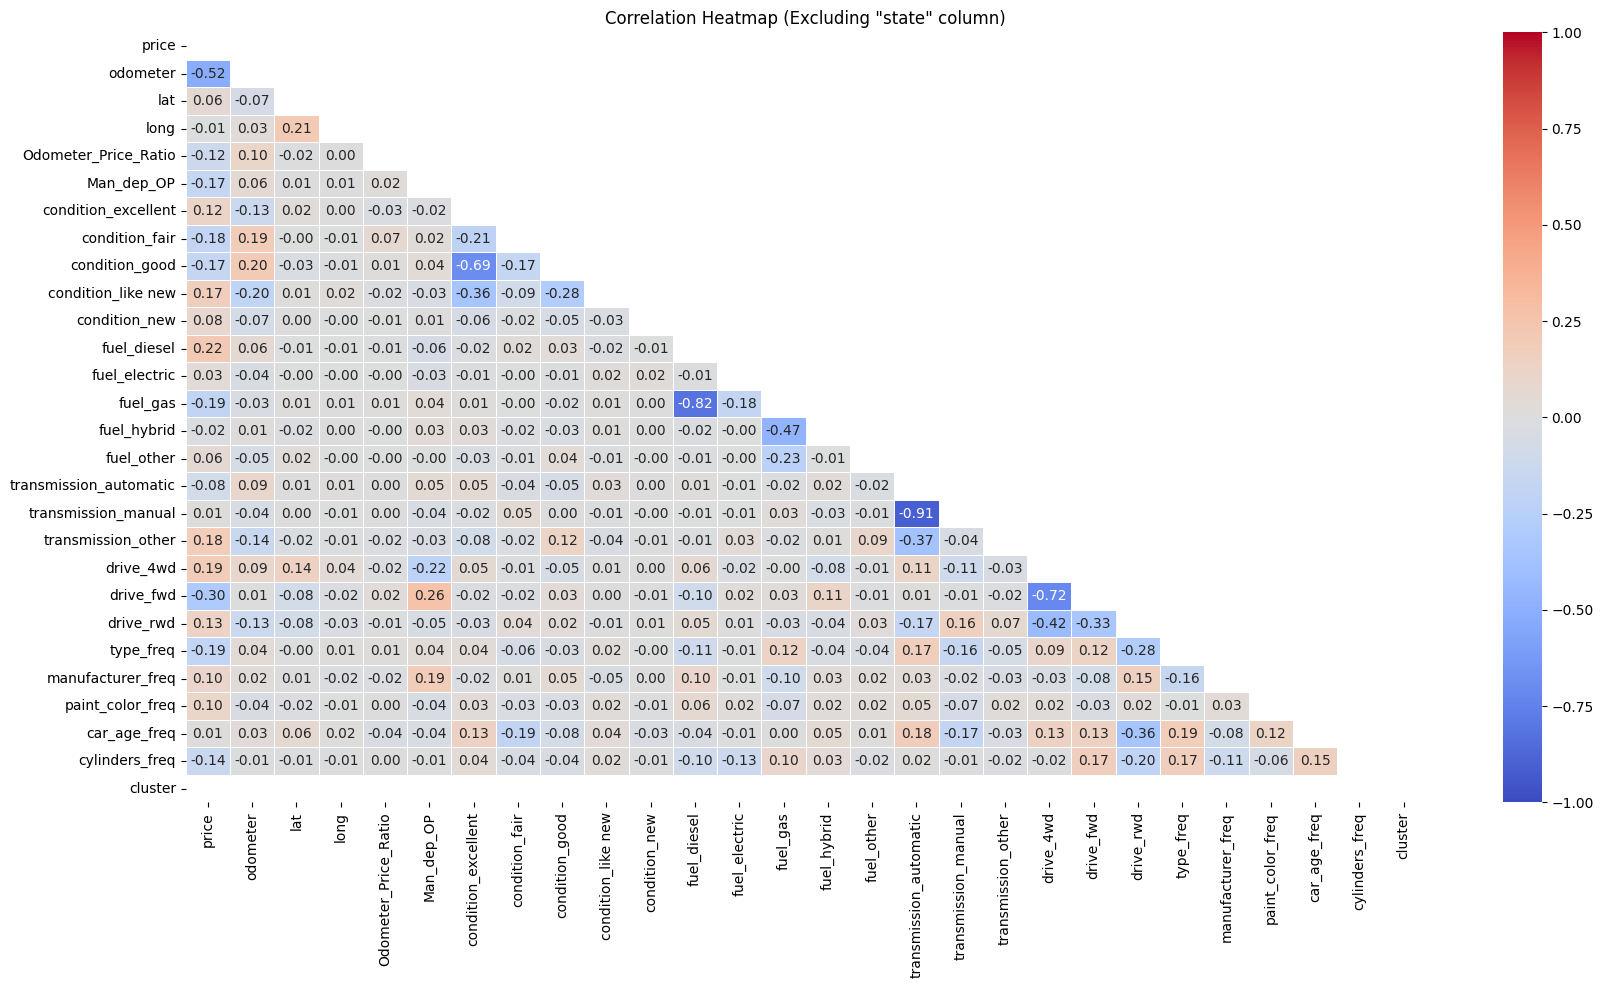

price                     0
odometer                  0
lat                       0
long                      0
Odometer_Price_Ratio      0
Man_dep_OP                0
condition_excellent       0
condition_fair            0
condition_good            0
condition_like new        0
condition_new             0
fuel_diesel               0
fuel_electric             0
fuel_gas                  0
fuel_hybrid               0
fuel_other                0
transmission_automatic    0
transmission_manual       0
transmission_other        0
drive_4wd                 0
drive_fwd                 0
drive_rwd                 0
type_freq                 0
manufacturer_freq         0
paint_color_freq          0
car_age_freq              0
cylinders_freq            0
cluster                   0
dtype: int64


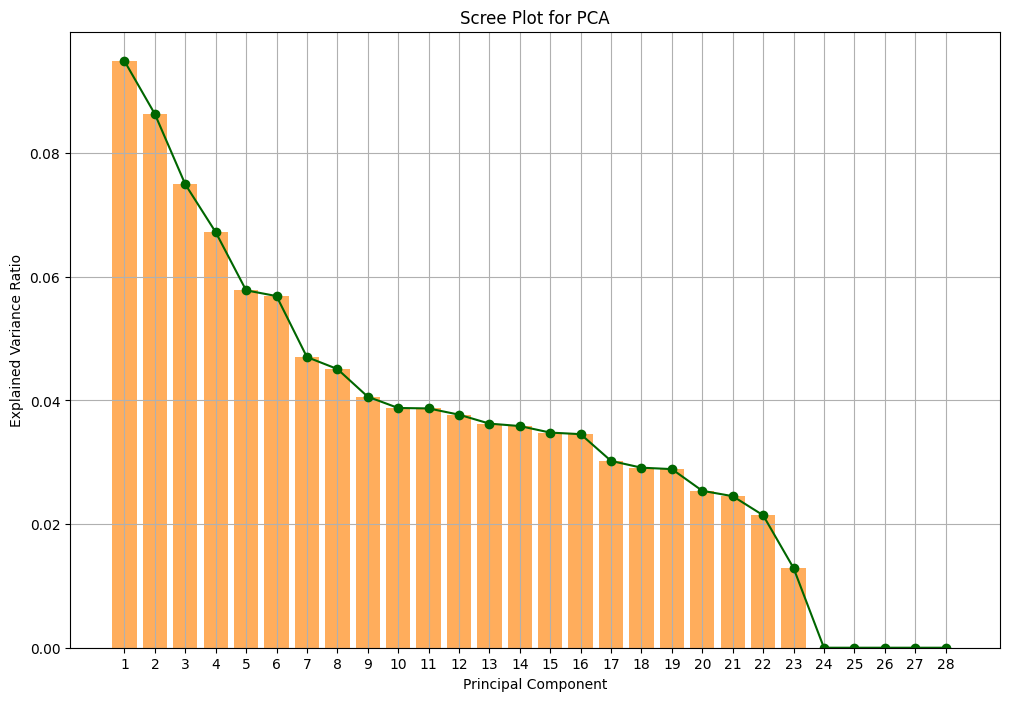

r2_Score of LinearRegression() model on training Data is: 46.85304048952612
r2_Score of LinearRegression() model on testing Data is: 48.11824139332548
RMSE of LinearRegression() model on training Data is: 7387.0874353727595
RMSE of LinearRegression() model on testing Data is: 7199.463377451692
***************************************************
***************************************************
r2_Score of DecisionTreeRegressor() model on training Data is: 99.99181323569675
r2_Score of DecisionTreeRegressor() model on testing Data is: 40.98502043721116
RMSE of DecisionTreeRegressor() model on training Data is: 91.68328615779336
RMSE of DecisionTreeRegressor() model on testing Data is: 7678.456231216771
***************************************************
***************************************************
r2_Score of RandomForestRegressor() model on training Data is: 95.65342890774275
r2_Score of RandomForestRegressor() model on testing Data is: 73.48010694003555
RMSE of RandomForestRe

Testing Random Forest model...
Testing Decision Tree model...
Testing XGBoost model...
Testing Linear Regression model...
Predicted price using Random Forest model: [5471.18]
Test R2 Score: 0.7344, Test RMSE: 5150.7478
Predicted price using Decision Tree model: [6995.]
Test R2 Score: 0.3796, Test RMSE: 7872.8226
Predicted price using XGBoost model: [4283.1055]
Test R2 Score: 0.7622, Test RMSE: 4874.1153
Predicted price using Linear Regression model: [11117.62293936]
Test R2 Score: 0.4812, Test RMSE: 7199.4634
Predicted price using Random Forest model: [5471.18]
Test R2 Score: 0.7344, Test RMSE: 5150.7478
Test MSE: 26530202.7077
Predicted price using Decision Tree model: [6995.]
Test R2 Score: 0.3796, Test RMSE: 7872.8226
Test MSE: 61981336.0068
Predicted price using XGBoost model: [4283.1055]
Test R2 Score: 0.7622, Test RMSE: 4874.1153
Test MSE: 23757000.1900
Predicted price using Linear Regression model: [11117.62293936]
Test R2 Score: 0.4812, Test RMSE: 7199.4634
Test MSE: 51832272.9

In [134]:
%run Vehicle_Clusters4.ipynb